___
# MINIPROJETO 1

## <font color='red'>Carlos Henrique Ludman Junior</font>
___

## <font color='blue'>Gols na Champions League</font>

___
### Itens 1 a 3 - Resolução:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import decimal
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/Carlosjunior/Documents/CHL/Insper fisico/2 semestre/Ciencia dos Dados


In [2]:
dados = pd.read_excel('Gols_Champions_2.xlsx')

In [4]:
lista=list(dados.FAIXA_GOL)
lista2=[]
for i in lista:
    if i == 1:
        lista2.append(np.random.randint(0,15))
    elif i==2:
        lista2.append(np.random.randint(15,30))
    elif i ==3:
        lista2.append(np.random.randint(30,45))
    elif i == 4:
        lista2.append(45)
    elif i == 5:
        lista2.append(np.random.randint(45,60))
    elif i == 6:
        lista2.append(np.random.randint(60,75))
    elif i == 7:
        lista2.append(np.random.randint(75,90))
    elif i == 8:
        lista2.append(90)
    elif i == 9:
        lista2.append(np.random.randint(90,105))
    elif i == 10:
        lista2.append(np.random.randint(105,120))
        


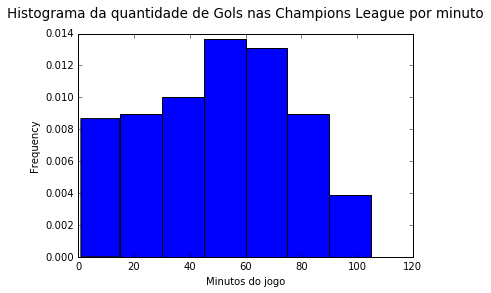

In [70]:
dados['MGOL']=lista2
faixas=[1,15,30,45,60,75,90,105,120]
dados.MGOL.plot.hist(bins=faixas, normed =1)
plt.title("Histograma da quantidade de Gols nas Champions League por minuto",fontsize="13.5", y = 1.05)
plt.xlabel("Minutos do jogo") 

#### O gráfico é assimétrico positivo.

___
### Itens 4 a 6 - Resolução:

<font size = 5 px> A distribuição parece muito com a distribuição normal </font>

link: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

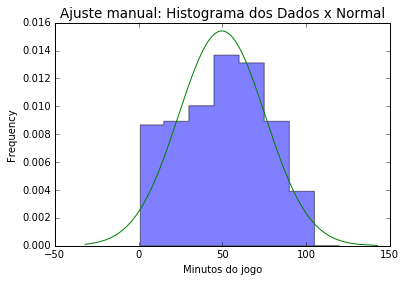

In [73]:
mi=49.7
sigma=25.9
x=sorted(stats.norm.rvs(size=4000, loc=mi, scale=sigma))
v = dados.MGOL.plot.hist(bins=faixas,normed = 1,histtype='stepfilled',alpha=0.5)
plot = plt.plot(x, stats.norm.pdf(x, loc=mi, scale=sigma))
plt.title("Ajuste manual: Histograma dos Dados x Normal",fontsize="13.5", y = 1)
plt.xlabel("Minutos do jogo") 

<font size = 5 px> A distribuição também está parecida tambem com a distribuição com a gumbel_r.</font>

link: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html#scipy.stats.gumbel_r

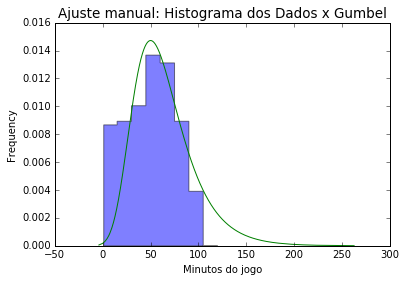

In [74]:
mi=50
sigma=25

z=sorted(stats.gumbel_r.rvs(size=4000, loc=mi, scale=sigma))
v = dados.MGOL.plot.hist(bins=faixas,normed = 1,histtype='stepfilled',alpha=0.5)
plot = plt.plot(z, stats.gumbel_r.pdf(z, loc=mi, scale=sigma))
plt.title("Ajuste manual: Histograma dos Dados x Gumbel",fontsize="13.5", y = 1)
plt.xlabel("Minutos do jogo") 

In [9]:
mu_g,std_g=stats.gumbel_r.fit(dados.MGOL)

In [10]:
mu_norm,std_norm=stats.norm.fit(dados.MGOL,loc=0,scale=1)

<font size = 3.5 px> Acima foi utilizado a função <font type="Times">*.fit*</font> para o ajuste dos parametros </font>
___
### Itens 7 a 9 - Resolução:

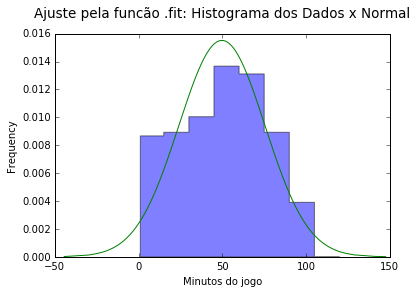

In [76]:
x=sorted(stats.norm.rvs(size=4000, loc=mu_norm, scale=std_norm))
v = dados.MGOL.plot.hist(bins=faixas,normed = 1,histtype='stepfilled',alpha=0.5)
plot = plt.plot(x, stats.norm.pdf(x, loc=mu_norm, scale=std_norm))
plt.title("Ajuste pela funcão .fit: Histograma dos Dados x Normal",fontsize="13.5", y = 1.05)
plt.xlabel("Minutos do jogo") 

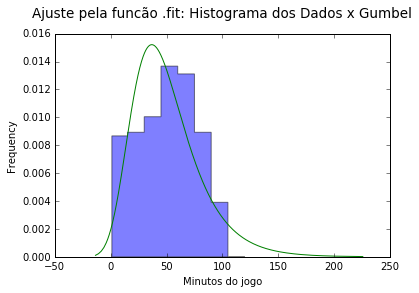

In [78]:
z=sorted(stats.gumbel_r.rvs(size=4000, loc=mu_g, scale=std_g))
v = dados.MGOL.plot.hist(bins=faixas,normed = 1,histtype='stepfilled',alpha=0.5)
plot = plt.plot(z, stats.gumbel_r.pdf(z, loc=mu_g, scale=std_g))
plt.title("Ajuste pela funcão .fit: Histograma dos Dados x Gumbel",fontsize="13.5", y = 1.05)
plt.xlabel("Minutos do jogo") 

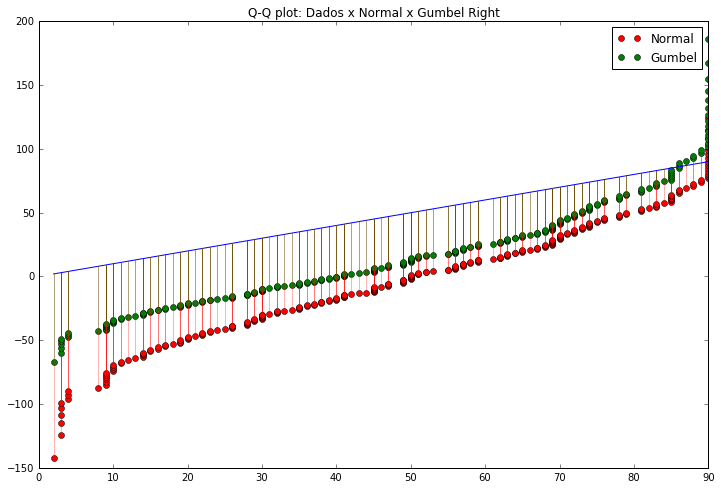

In [19]:
MGOL = pd.Series(data=sorted(dados.MGOL))

fra = [] # frequencia relativa acumulada
for i in range(len(dados.MGOL)):
    acc = (i - 0.5) / len(dados.MGOL)
    if acc < 0:
        acc = 0
    fra.append(acc)
    
#Pandas
fra = pd.Series(data=fra)

#gerando quantil
q_norm = stats.norm.ppf(fra, scale=mu_norm) # quantis teóricos da norm
q_gumbel = stats.gumbel_r.ppf(fra, scale=mu_g) # quantis teóricos da gumbel

#Plot

fig = plt.figure(figsize=(12,8))

plt.title("Q-Q plot: Dados x Normal x Gumbel Right")

norm_plot, = plt.plot(MGOL, q_norm, 'o', color="red", label="Normal")
gumbel_plot, = plt.plot(MGOL, q_gumbel, 'o', color="green", label = "Gumbel")

plt.legend(handles=[norm_plot, gumbel_plot])
plt.plot((min(MGOL), max(MGOL)), (min(MGOL), max(MGOL)), '-')

for i in range(len(dados.MGOL)):
    plt.plot((MGOL[i], MGOL[i]), (q_norm[i], MGOL[i]), '-', color='red', alpha=0.3  )
    plt.plot((MGOL[i], MGOL[i]), (q_gumbel[i], MGOL[i]), '-', color='green', alpha=0.3  )

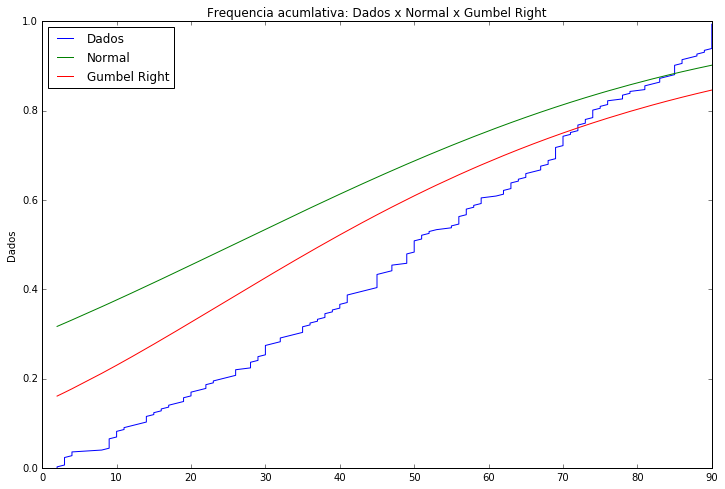

In [27]:
fig = plt.figure(figsize=(12,8))

plt.title("Frequencia acumlativa: Dados x Normal x Gumbel Right")
plot1 = plt.plot(MGOL,fra, label="Dados")
norm_plot2 = plt.plot(MGOL, stats.norm.cdf(MGOL,loc=std_norm,scale=mu_norm),label="Normal" )
gumbel_plot2 = plt.plot(MGOL,stats.gumbel_r.cdf(MGOL,loc=std_g,scale=mu_g),label="Gumbel Right" )
plt.legend(loc="best")

___
### Itens 10 e 11 - Resolução:

In [30]:
q_norm2=q_norm[1:]
MGOL2=MGOL[1:]
q_gumbel2=q_gumbel[1:]

erro_quadratico_norm = sum((MGOL2 - q_norm2)**2)
erro_quadratico_gumbel = sum((MGOL2 - q_gumbel2)**2)

print("Erro quadrático da normal :{0}\n".format(erro_quadratico_norm))
print("Erro quadrático da gumbel :{0}\n".format(erro_quadratico_gumbel))

Erro quadrático da normal :747013.3123675679

Erro quadrático da gumbel :328589.16527609585



In [31]:
eqm_norm = erro_quadratico_norm/len(MGOL2)
eqm_gumbel = erro_quadratico_gumbel/len(MGOL2)

print("Erro quadratico médio da normal :", eqm_norm)
print("Erro quadratico médio da gumbel :", eqm_gumbel)

Erro quadratico médio da norm : 3138.7113965
Erro quadratico médio da gumbel : 1380.62674486


In [32]:
soma_diferenças_norm = sum(abs(MGOL2 - q_norm2))
soma_diferenças_gumbel = sum(abs(MGOL2 - q_gumbel2))

print("Soma de diferenças da normal :", soma_diferenças_norm)
print("Soma de diferenças da gumbel :", soma_diferenças_gumbel)

Soma de diferenças da exponencial : 12245.1048077
Soma de diferenças da gamma : 8265.29630355


In [51]:
norm_pdf=stats.norm.pdf(MGOL)

dic = {"Dados":MGOL,"Normal":(stats.norm.rvs(MGOL)).round(2),"Gumbel":(stats.gumbel_r.rvs(MGOL)).round(2)}
data=pd.DataFrame(dic)
data

,Dados,Gumbel,Normal
0,2,1.5,1.06
1,2,1.5,1.06
2,3,2.5,2.06
3,3,2.5,2.06
4,3,2.5,2.06
5,3,2.5,2.06
6,3,2.5,2.06
7,4,3.5,3.06
8,4,3.5,3.06
9,4,3.5,3.06


### Conclusão
Como o Erro quadratico normal e do gumbel ficaram muito alto, assim como os Erros Quadraticos  Médios e as Somas das diferenças, talvez nenhum deles seja o melhor para ser utilizados para esses dados. Mas a tabela mostra que os valores para a distribuição gumbel se aproximam muito mais dos valores dos dados do que a distribuição normal.